In [1]:
import codecs
import collections
import re
 
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
import matplotlib.pyplot as plt

In [2]:
# ucitavanje dokumenta
with codecs.open("extractText.txt", "r", encoding="utf-8") as f:
    text=f.read()

In [3]:
# uklonimo interpunkciju i sve reci koje u sebi sadrze brojeve, kao i oznake za novi red
text= re.sub(r'[^\w\s]', '', text)
text= re.sub(r'[0-9]+', '', text)
text= re.sub(r'[a-z]{1}\d+', '', text)
text= re.sub(r'\n','', text)
text= text.lower()
text

'five sections of the polypeptidechain are either invisible or poorly defined in the electron density map for the first molecule of the dimer in the asymmetric unit they are a to a the n terminus of the cterminal domain a to a a to a a to a and a to a whilst for the second molecule they are b to b b to b b to b b to b and b to bfive sections of the polypeptidechain are either invisible or poorly defined in the electron density map for the first molecule of the dimer in the asymmetric unit they are a to a the n terminus of the cterminal domain a to a a to a a to a and a to a whilst for the second molecule they are b to b b to b b to b b to b and b to bthe cd spectrum of ll in water exhibits a minimum around  nm which is indicative of a highly disordered conformationtaken together this highly cooperative concentrationdependent helixcoil equilibrium is highly reminiscent of the monomeroligomer transitions common to peptide sequences capable of forming amphipathic αhelices eg melittin ref 

In [4]:
# izbacujemo sve stopreci iz teksta
# nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('english')
text1 = word_tokenize(text.lower())
new_stopwords = ['fig', 'figure' , 'å', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 
                 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'z', 'y', 'β', 'μ', 'α', 'δ', 'γα', 'χ', 'ρ',
                'δδ', 'θ', 'φφ','φ', 'ππ', 'ψ', 'η', 'ε', 'ϵ', 'þ', 'bthe', 'cd', 'nm', 'eg', 'ref', 'mmnacl', 'hco',
                'na', 'mg', 'μm', 'fda', 'ph','hll', 'tem', 'nmr', 'also', 'used', 'saxs', 'λ', 'idp', 'eq', 'et', 
                 'boxb','kd', 'hsmqc', 'kim', 'baldwin', 'at', 'λn', 'nusa', 'nusg', 'nuse', 'al', 'gst', 'nusa', 
                 'cl', 'cyt', 'could', 'whilst', 'upon', 'shown', 'showed', 'within']
stopwords.extend(new_stopwords)
nonStop = [x for x in text1 if x not in stopwords]
resText=""
for word in nonStop:
    resText+=word
    resText+=" "
resText

'five sections polypeptidechain either invisible poorly defined electron density map first molecule dimer asymmetric unit terminus cterminal domain second molecule bfive sections polypeptidechain either invisible poorly defined electron density map first molecule dimer asymmetric unit terminus cterminal domain second molecule spectrum water exhibits minimum around indicative highly disordered conformationtaken together highly cooperative concentrationdependent helixcoil equilibrium highly reminiscent monomeroligomer transitions common peptide sequences capable forming amphipathic αhelices melittin affects structure limited extent replacement effect structural transitions observed shows structural changes predominantly caused cfcoanionsthe helical oligomeric conformation apparently requirement activity since highest antibacterial activity correlates maximal helical content intermediate low activities correspond less helical content disordered secondary structure minimal inhibitory conce

In [5]:
# prvo pronalazimo sintagme koje se cesto javljaju. Bice izdvojene sintagme koje sadrze 2, 3 ili 4 reci
from nltk.stem import WordNetLemmatizer
#nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in word_tokenize(resText)]
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

# nalazimo najcesce dvoclane sintagme
finder = BigramCollocationFinder.from_words(lemmatized_words)
finder.apply_freq_filter(150)
two=finder.nbest(bigram_measures.pmi, 20)

# izdvajanje najcescih troclanih sintagmi
threeFinder = TrigramCollocationFinder.from_words(lemmatized_words)
threeFinder.apply_freq_filter(100)
three=threeFinder.nbest(trigram_measures.pmi, 20)

# i, na kraju, nalazenje najcescih cetvoroclanih sintagmi
fourFinder = QuadgramCollocationFinder.from_words(lemmatized_words)
fourFinder.apply_freq_filter(80)
four=fourFinder.nbest(fourgram_measures.pmi, 20)


In [6]:
keywords=[]
concatenatedList=two+three+four

for elem in concatenatedList:
    keyword=' '.join([str(item) for item in elem])
    keywords.append(keyword)
keywords

['circular dichroism',
 'random coil',
 'chemical shift',
 'amino acid',
 'final model',
 'lir motif',
 'electron density',
 'active site',
 'hsqc spectrum',
 'density map',
 'intrinsically disordered',
 'secondary structure',
 'crystal structure',
 'corresponds region',
 'binding site',
 'cterminal domain',
 'nterminal region',
 'cterminal region',
 'disordered region',
 'cterminal residue',
 'hn hsqc spectrum',
 'electron density map',
 'visible electron density',
 'lack electron density',
 'amino acid sequence',
 'amino acid residue',
 'lack electron density indicating',
 'show region lack electron',
 'region lack electron density']

In [7]:
# tokenizacija procesiranog teksta

resText=""
for word in lemmatized_words:
    resText+=word
    resText+=" "

from nltk.probability import FreqDist
token = word_tokenize(resText)
token

['five',
 'section',
 'polypeptidechain',
 'either',
 'invisible',
 'poorly',
 'defined',
 'electron',
 'density',
 'map',
 'first',
 'molecule',
 'dimer',
 'asymmetric',
 'unit',
 'terminus',
 'cterminal',
 'domain',
 'second',
 'molecule',
 'bfive',
 'section',
 'polypeptidechain',
 'either',
 'invisible',
 'poorly',
 'defined',
 'electron',
 'density',
 'map',
 'first',
 'molecule',
 'dimer',
 'asymmetric',
 'unit',
 'terminus',
 'cterminal',
 'domain',
 'second',
 'molecule',
 'spectrum',
 'water',
 'exhibit',
 'minimum',
 'around',
 'indicative',
 'highly',
 'disordered',
 'conformationtaken',
 'together',
 'highly',
 'cooperative',
 'concentrationdependent',
 'helixcoil',
 'equilibrium',
 'highly',
 'reminiscent',
 'monomeroligomer',
 'transition',
 'common',
 'peptide',
 'sequence',
 'capable',
 'forming',
 'amphipathic',
 'αhelices',
 'melittin',
 'affect',
 'structure',
 'limited',
 'extent',
 'replacement',
 'effect',
 'structural',
 'transition',
 'observed',
 'show',
 'stru

In [8]:
# nalazenje reci koje se najcesce pojavljuju u procesiranom tekstu
fdist = FreqDist(token)
fdist

FreqDist({'residue': 6998, 'region': 3836, 'structure': 3367, 'domain': 3111, 'protein': 3064, 'disordered': 2746, 'binding': 2387, 'spectrum': 1578, 'cterminal': 1530, 'loop': 1511, ...})

In [9]:
# izdvajanje prvih 100 najcescih reci 
fdist1 = fdist.most_common(100)
fdist1

[('residue', 6998),
 ('region', 3836),
 ('structure', 3367),
 ('domain', 3111),
 ('protein', 3064),
 ('disordered', 2746),
 ('binding', 2387),
 ('spectrum', 1578),
 ('cterminal', 1530),
 ('loop', 1511),
 ('complex', 1417),
 ('nterminal', 1414),
 ('interaction', 1380),
 ('density', 1367),
 ('two', 1289),
 ('peptide', 1276),
 ('electron', 1220),
 ('show', 1122),
 ('observed', 1034),
 ('flexible', 1026),
 ('acid', 1025),
 ('amino', 966),
 ('site', 941),
 ('data', 912),
 ('crystal', 865),
 ('form', 854),
 ('motif', 853),
 ('helix', 852),
 ('shift', 850),
 ('result', 835),
 ('conformation', 825),
 ('linker', 809),
 ('sequence', 777),
 ('secondary', 722),
 ('fragment', 715),
 ('presence', 704),
 ('unstructured', 690),
 ('bind', 689),
 ('model', 676),
 ('chemical', 675),
 ('value', 629),
 ('change', 609),
 ('bound', 597),
 ('segment', 569),
 ('structural', 560),
 ('indicating', 547),
 ('chain', 543),
 ('peak', 535),
 ('analysis', 532),
 ('cell', 530),
 ('first', 512),
 ('resonance', 508),
 ('

In [10]:
# dodajemo i ove reci u skup kljucnih reci
keywords2=[]
for keyword in fdist1:
    keywords2.append(keyword[0])
    keywords.append(keyword[0])
keywords

['circular dichroism',
 'random coil',
 'chemical shift',
 'amino acid',
 'final model',
 'lir motif',
 'electron density',
 'active site',
 'hsqc spectrum',
 'density map',
 'intrinsically disordered',
 'secondary structure',
 'crystal structure',
 'corresponds region',
 'binding site',
 'cterminal domain',
 'nterminal region',
 'cterminal region',
 'disordered region',
 'cterminal residue',
 'hn hsqc spectrum',
 'electron density map',
 'visible electron density',
 'lack electron density',
 'amino acid sequence',
 'amino acid residue',
 'lack electron density indicating',
 'show region lack electron',
 'region lack electron density',
 'residue',
 'region',
 'structure',
 'domain',
 'protein',
 'disordered',
 'binding',
 'spectrum',
 'cterminal',
 'loop',
 'complex',
 'nterminal',
 'interaction',
 'density',
 'two',
 'peptide',
 'electron',
 'show',
 'observed',
 'flexible',
 'acid',
 'amino',
 'site',
 'data',
 'crystal',
 'form',
 'motif',
 'helix',
 'shift',
 'result',
 'conformati

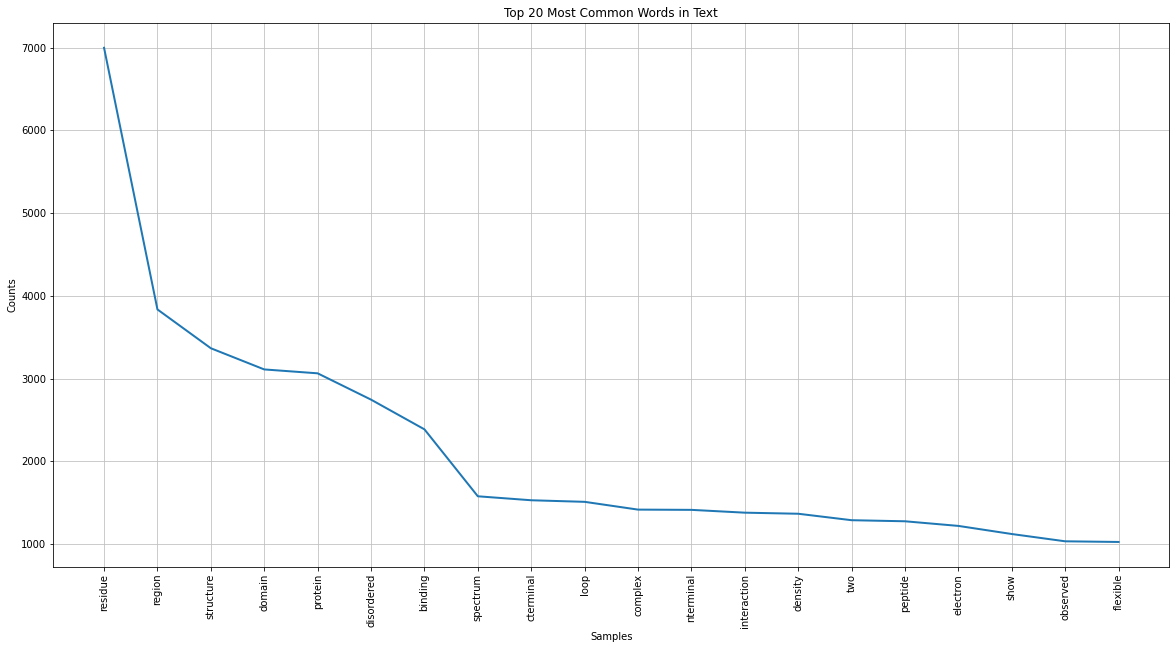

<Figure size 432x288 with 0 Axes>

In [11]:
fig=plt.figure(figsize=(20,10))
plt.ion()
fdist.plot(20, title='Top 20 Most Common Words in Text')
plt.savefig('img_top10_common.png')
plt.ioff()
plt.show()
fig.savefig('frequency_plot.png')

/home/andjela/.local/lib/python3.8/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


<Figure size 2160x1440 with 0 Axes>

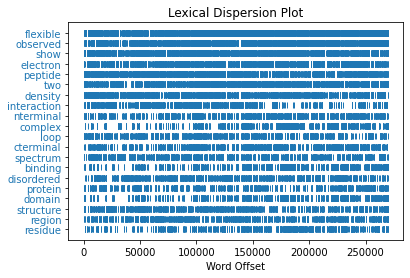

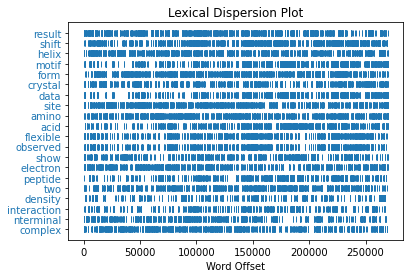

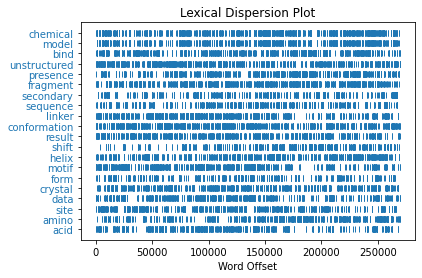

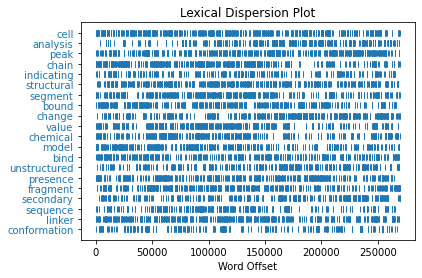

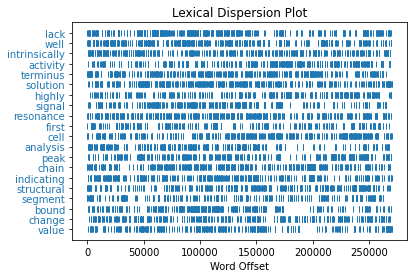

In [12]:
text1 = nltk.Text(word_tokenize(resText))
fig = plt.figure(figsize=(30,20))


for i in range(0,5):
    fig_name="word_frequency_"+str(i+1)+".png"
    plt.ion()
    dplot = text1.dispersion_plot(keywords2[(i*10):(i+2)*10])
    plt.savefig(fig_name)
    plt.ioff()
    plt.show()


In [13]:
# na kraju ispisujemo sve kljucne reci u jedan fajl

file=open("keywords.txt", "w")
for keyword in keywords:
    file.write(keyword)
    file.write("\n")
file.close()